### Fraudlent Transaction Monitoring using Machine Learning in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### The dataset includes the features like type of payment, Old balance , amount paid, name of the destination, etc.

In [ ]:
data = pd.read_csv('new_data.csv')
data.head()


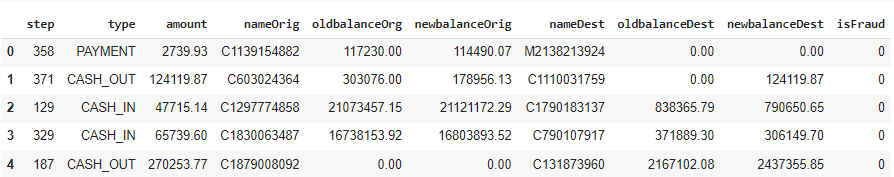

In [ ]:
data.info()

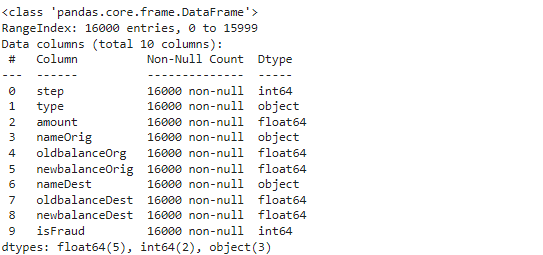

In [ ]:
data.describe()


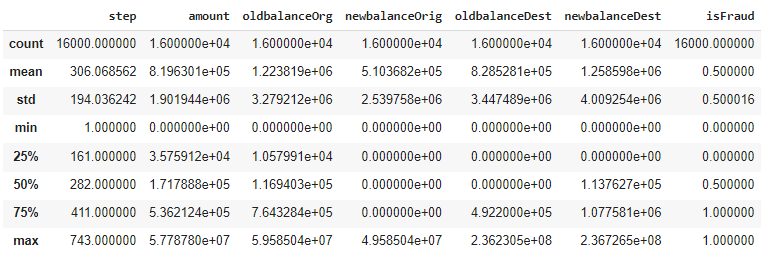

### Data Visualization

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


###  
We observed Three (3) Categorical variables ; TWO (2) Integer variables ; FIVE (5) Float variables

In [ ]:
sns.countplot(x='type', data=data)


In [ ]:
sns.barplot(x='type', y='amount', data=data)


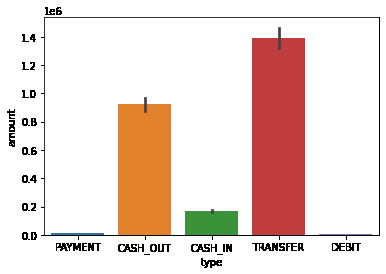

In [ ]:
data['isFraud'].value_counts()


In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)


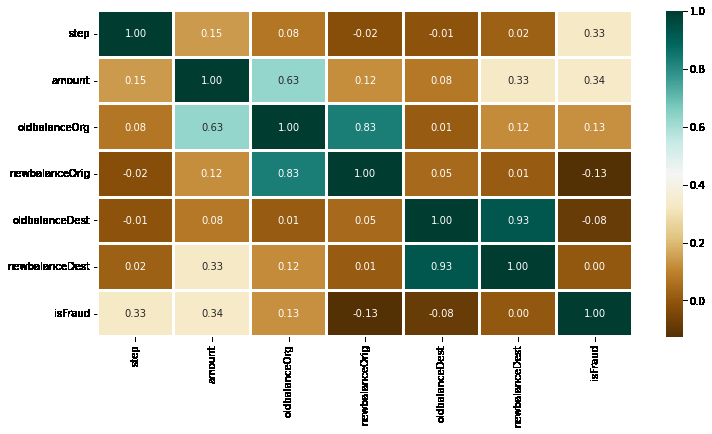

### Data Preprocessing

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


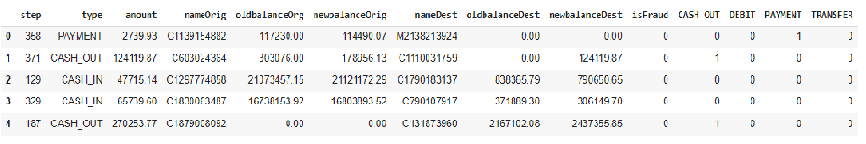

In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


In [ ]:
X.shape, y.shape


### Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
models = [LogisticRegression(), XGBClassifier(),
		SVC(kernel='rbf', probability=True),
		RandomForestClassifier(n_estimators=7,
								criterion='entropy', 
								random_state=7)]

for i in range(len(models)):
	models[i].fit(X_train, y_train)
	print(f'{models[i]} : ')
	
	train_preds = models[i].predict_proba(X_train)[:, 1]
	print('Training Accuracy : ', ras(y_train, train_preds))
	
	y_preds = models[i].predict_proba(X_test)[:, 1]
	print('Validation Accuracy : ', ras(y_test, y_preds))
	print()


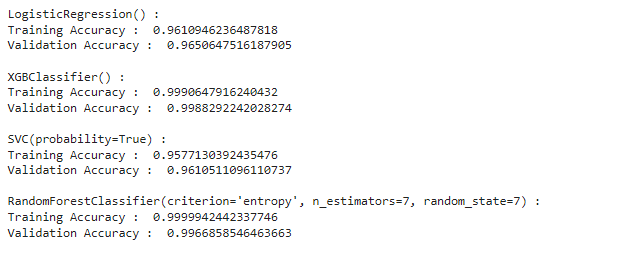

### Model Evaluation

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(models[1], X_test, y_test)
plt.show()


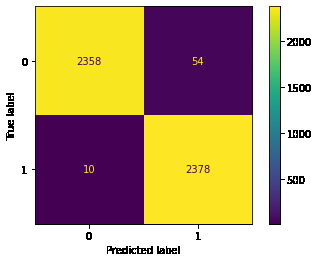